In [1]:
import scanpy as sc
import torch
import numpy as np

random_seed = 0
np.random.seed(random_seed)
torch.manual_seed(random_seed)

In [2]:
import pandas as pd
import os
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_132642/2174054843.py:8: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [4]:
from utils.util import run_pca
import magic
import warnings
from train_metric import train_metric_learner
import networkx as nx
import sklearn

In [7]:
import os
try:
		if os.path.exists("multifurcating_1.rds"):
			%R dataset <- readRDS("multifurcating_1.rds")
		else:
			print("File 'multifurcating_1.rds' not found.")
except:
		if os.path.exists("multifurcating_1.rds"):
			%R dataset <- readRDS("multifurcating_1.rds")
		else:
			print("File 'multifurcating_1.rds' not found.")

In [8]:
%%R
str(dataset)

List of 17
 $ id                   : chr "synthetic/splatter/multifurcating_1"
 $ cell_ids             : chr [1:920] "Cell1" "Cell2" "Cell3" "Cell4" ...
 $ cell_info            : NULL
 $ counts               : num [1:920, 1:1254] 48 0 0 18 31 38 11 31 19 17 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:920] "Cell1" "Cell2" "Cell3" "Cell4" ...
  .. ..$ : chr [1:1254] "Gene4247" "Gene4771" "Gene2697" "Gene3227" ...
 $ expression           : num [1:920, 1:1254] 5.25 0 0 4.26 4.36 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:920] "Cell1" "Cell2" "Cell3" "Cell4" ...
  .. ..$ : chr [1:1254] "Gene4247" "Gene4771" "Gene2697" "Gene3227" ...
 $ feature_info         :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1254 obs. of  1 variable:
  ..$ feature_id: chr [1:1254] "Gene4247" "Gene4771" "Gene2697" "Gene3227" ...
 $ milestone_ids        : chr [1:9] "M1" "M3" "M6" "M8" ...
 $ milestone_network    :Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	8 obs. of  4 variables:
  ..$ from  

In [9]:
expression_df = 1

In [10]:
%%R -o expression_df
expression_df <- as.data.frame(dataset$expression)

In [11]:
expression_df

,Gene4247,Gene4771,Gene2697,Gene3227,Gene2112,Gene4564,Gene2255,Gene7953,Gene7815,Gene27,...,Gene7211,Gene3286,Gene3655,Gene424,Gene4610,Gene6059,Gene7393,Gene671,Gene3201,Gene7355
Cell1,5.249972,4.449087,3.738908,0.825343,6.652233,2.678904,2.493580,4.594470,4.229203,2.843109,...,3.820001,7.917971,10.029918,7.258098,6.942152,5.802423,6.641118,2.678904,7.228699,5.389349
Cell2,0.000000,4.900236,3.483696,3.369842,5.956972,3.246227,0.886652,2.390779,3.369842,2.607220,...,3.589218,7.166032,9.697587,7.451381,6.719900,6.424386,6.014937,3.246227,6.242250,6.052325
Cell3,0.000000,5.048295,4.261829,1.049384,6.768637,5.048295,0.000000,1.049384,5.739109,4.261829,...,3.256582,7.488891,9.780013,7.666494,7.140815,5.709924,6.453538,4.091250,6.768637,4.901129
Cell4,4.256267,0.000000,2.328973,5.052929,6.434964,4.962714,0.000000,4.178239,4.531981,1.004407,...,4.400701,7.339663,9.964442,8.247177,6.681140,5.293978,6.516499,3.007704,7.008732,3.915107
Cell5,4.358955,2.986671,3.469210,4.486004,3.199402,3.830173,3.295055,4.065390,3.199402,3.696421,...,4.486004,7.727521,10.134864,7.544997,6.518429,5.323366,5.277261,3.696421,6.498473,5.103195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell926,3.469309,3.469309,4.219730,1.175969,6.372674,5.368150,3.295154,3.097051,3.295154,3.892771,...,3.892771,7.261089,9.640660,7.588234,7.002299,5.323472,5.752126,3.097051,6.160456,5.076628
Cell927,5.078278,1.065440,0.000000,4.026739,6.681324,0.000000,1.065440,4.443829,1.065440,2.425253,...,4.026739,7.458195,9.894428,7.449202,6.586078,5.710447,6.393234,4.646265,6.448435,4.026739
Cell928,4.027335,3.011554,4.870725,3.802324,6.961458,5.273382,1.122598,4.617519,4.027335,3.535616,...,4.811467,7.701967,9.784121,7.863848,6.756787,5.903747,5.439156,2.513377,6.891647,5.035161
Cell929,2.707669,0.000000,0.000000,0.000000,6.652311,6.231462,1.074869,4.225313,3.454015,3.943443,...,3.454015,7.284609,9.031446,8.117033,6.553799,5.666583,5.976494,3.454015,6.273341,5.390311


In [12]:
data = sc.AnnData(expression_df)

In [13]:
from utils.util import run_pca

# Apply PCA on the raw data for initial denoising
print('Computing PCA...')
X_pca, va, n_comps = run_pca(data, use_hvg=False, n_components=300)
data.obsm['X_pca'] = X_pca
print(f'Components computed: {n_comps}')

Computing PCA...
Runtime for run_pca(): 9.791505336761475
Components computed: 300


In [14]:
import magic

# Apply MAGIC for PCA data denoising
magic_op = magic.MAGIC(random_state=random_seed, solver='approximate', n_pca=n_comps)
X_magic = magic_op.fit_transform(data.X, genes='pca_only')
data.obsm['X_magic_pca'] = X_magic

Calculating MAGIC...
  Running MAGIC on 920 cells and 1254 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


    Calculated PCA in 8.96 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.36 seconds.
    Calculating affinities...
    Calculated affinities in 0.26 seconds.
  Calculated graph and diffusion operator in 9.60 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 9.72 seconds.


In [15]:
import warnings
from train_metric import train_metric_learner

with warnings.catch_warnings():
    # Filter out user warnings from PyTorch about saving scheduler state
    warnings.simplefilter("ignore")
    train_metric_learner(data, n_episodes=5, n_metric_epochs=30, obsm_data_key='X_magic_pca', code_size=10,
        backend='leiden', device='cpu', save_path='./metric_1',
        cluster_kwargs={'random_state': 0, 'resolution': 1.0}, nn_kwargs={'random_state': 0, 'n_neighbors': 50},
        trainer_kwargs={'optimizer': 'SGD', 'lr': 0.01, 'batch_size': 256}
    )

Generating initial clusters


Runtime for determine_cell_clusters(): 7.6821448802948
Training for episode: 1


100%|██████████| 920/920 [00:00<00:00, 4730.66it/s]


Re-generating clusters for episode: 1
Runtime for determine_cell_clusters(): 0.336200475692749
Time Elapsed for epoch: 11.305208444595337s
Training for episode: 2


100%|██████████| 920/920 [00:00<00:00, 2094.33it/s]


Re-generating clusters for episode: 2
Runtime for determine_cell_clusters(): 0.3805351257324219
Time Elapsed for epoch: 11.876247644424438s
Training for episode: 3


100%|██████████| 920/920 [00:00<00:00, 2478.92it/s]


Re-generating clusters for episode: 3
Runtime for determine_cell_clusters(): 0.40160107612609863
Time Elapsed for epoch: 13.023964643478394s
Training for episode: 4


100%|██████████| 920/920 [00:00<00:00, 3908.34it/s]


Re-generating clusters for episode: 4
Runtime for determine_cell_clusters(): 0.2729299068450928
Time Elapsed for epoch: 11.400138854980469s
Training for episode: 5


100%|██████████| 920/920 [00:00<00:00, 1409.41it/s]


Re-generating clusters for episode: 5
Runtime for determine_cell_clusters(): 0.3947746753692627
Time Elapsed for epoch: 13.071840524673462s
Runtime for train_metric_learner(): 69.99424290657043


In [16]:
data.obsm

AxisArrays with keys: X_pca, X_magic_pca, metric_embedding

In [17]:
import magic

magic_op = magic.MAGIC(random_state=0, solver='approximate')
X_magic = magic_op.fit_transform(data.X, genes='all_genes')
data.obsm['X_magic'] = X_magic

Calculating MAGIC...
  Running MAGIC on 920 cells and 1254 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.95 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.14 seconds.
    Calculating affinities...
    Calculated affinities in 0.11 seconds.
  Calculated graph and diffusion operator in 3.21 seconds.
  Calculating imputation...
Calculated MAGIC in 3.30 seconds.


In [18]:
import numpy as np
from models.ti.connectivity import compute_directed_cluster_connectivity, compute_undirected_cluster_connectivity
from models.ti.graph import compute_trajectory_graph, compute_connectivity_graph
from utils.plot import plot_connectivity_graph, plot_trajectory_graph
from utils.util import get_start_cell_cluster_id

In [19]:
start_cell_ids = 1

In [20]:
%%R -o start_cell_ids
start_cell_ids = dataset$prior_information$start_id

In [21]:
start_cell_ids = list(start_cell_ids)
start_cell_ids

['Cell726']

In [22]:
communities = data.obs['metric_clusters'].astype(int)
adj_conn = data.obsp['connectivities']
adj_dist = data.obsp['distances']
# start_cell_ids = data.obs['palantir_pseudotime'].idxmin()
# start_cell_ids = [start_cell_ids] if isinstance(start_cell_ids, str) else list(start_cell_ids)
start_cluster_ids = get_start_cell_cluster_id(data, start_cell_ids, communities)
start_cluster_ids

{1}

In [23]:
adata = data.copy()

In [24]:
if 'metric_clustering_scores' in adata.uns:
    # Convert each element in the list to string
    adata.uns['metric_clustering_scores'] = [
        str(x) for x in adata.uns['metric_clustering_scores']
    ]


In [25]:
def sanitize_uns(data):
    for key in list(data.uns.keys()):
        # Handle lists
        if isinstance(data.uns[key], list):
            data.uns[key] = [str(x) for x in data.uns[key]]
        # Handle DataFrames
        elif isinstance(data.uns[key], pd.DataFrame):
            data.uns[key] = data.uns[key].astype(str)
    return data

adata = sanitize_uns(adata)


In [26]:
# Convert categorical columns to strings
for col in adata.obs.select_dtypes(['category', 'object']):
    adata.obs[col] = adata.obs[col].astype(str).fillna('')


In [27]:
adata.write("multifurcating_1_processed.h5ad")

In [28]:
import networkx as nx

from sklearn.neighbors import NearestNeighbors
from models.ti.pseudotime import compute_pseudotime
from models.ti.pseudotime_v2 import compute_pseudotime
from models.ti.graph import compute_trajectory_graph_v2
from utils.plot import plot_trajectory_graph_v2
from utils.plot import plot_pseudotime

In [29]:
X = data.obsm['metric_embedding']

n_neighbors = 30
nbrs = NearestNeighbors(n_neighbors=n_neighbors, metric="euclidean").fit(X)
adj_dist = nbrs.kneighbors_graph(X, mode="distance")
adj_conn = nbrs.kneighbors_graph(X)

In [30]:
from umap import UMAP

# Reduce 10D embeddings to 2D
reducer = UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(data.obsm['metric_embedding'])


/home/satwik/margaret-env/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [31]:
data.obsm["X_met_embedding"] = embeddings_2d

In [32]:
un_connectivity = pd.read_csv("un_connectivity_1.csv", index_col=0)

In [33]:
un_connectivity.index = un_connectivity.index.astype(int)
un_connectivity.columns = un_connectivity.columns.astype(int)


In [34]:
# Convert pandas/categorical types to numpy.int64
data.obs['metric_clusters'] = data.obs['metric_clusters'].astype(int)
communities = data.obs['metric_clusters'].astype(int)


In [35]:
# v2 pseudotime
G_undirected, node_positions = compute_connectivity_graph(data.obsm['X_met_embedding'], data.obs['metric_clusters'], un_connectivity)
adj_cluster = nx.to_pandas_adjacency(G_undirected)
pseudotime = compute_pseudotime(data, start_cell_ids, adj_dist, adj_cluster)

Runtime for compute_connectivity_graph(): 0.015256166458129883
Runtime for compute_pseudotime(): 0.25641727447509766


In [36]:
pseudotime

Cell1      12.150024
Cell2       7.975459
Cell3       7.951244
Cell4       3.585737
Cell5       6.142868
             ...    
Cell926    10.339589
Cell927     2.746470
Cell928     9.176491
Cell929     9.884953
Cell930     1.135687
Length: 920, dtype: float64

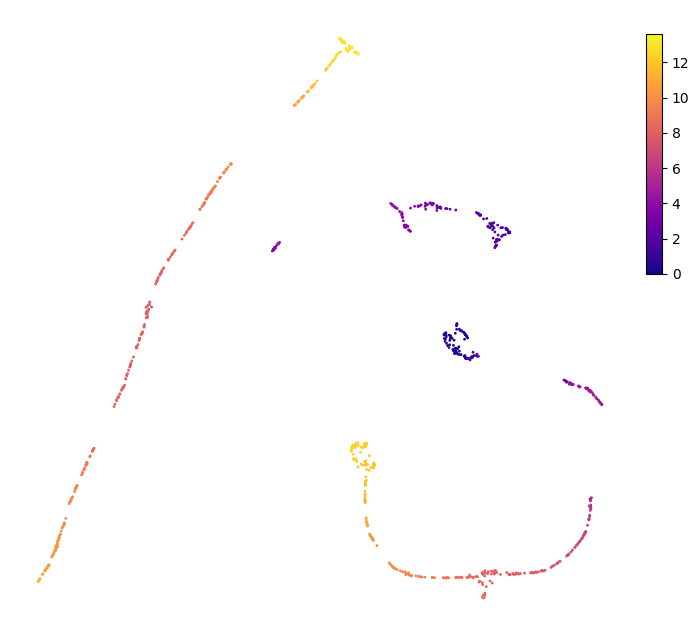

In [37]:
plot_pseudotime(
    data,
    embedding_key="X_met_embedding",
    pseudotime_key="metric_pseudotime_v2",
    s=1,
    cmap='plasma',
    figsize=(8, 8),
    cb_axes_pos=[0.92, 0.55, 0.02, 0.3]
)

In [39]:
connectivity, z_score = compute_directed_cluster_connectivity(communities, adj_conn, threshold=2)

Runtime for compute_directed_cluster_connectivity(): 0.14096903800964355


Runtime for compute_trajectory_graph_v2(): 0.030820369720458984
Runtime for compute_trajectory_graph_v2(): 0.03535580635070801


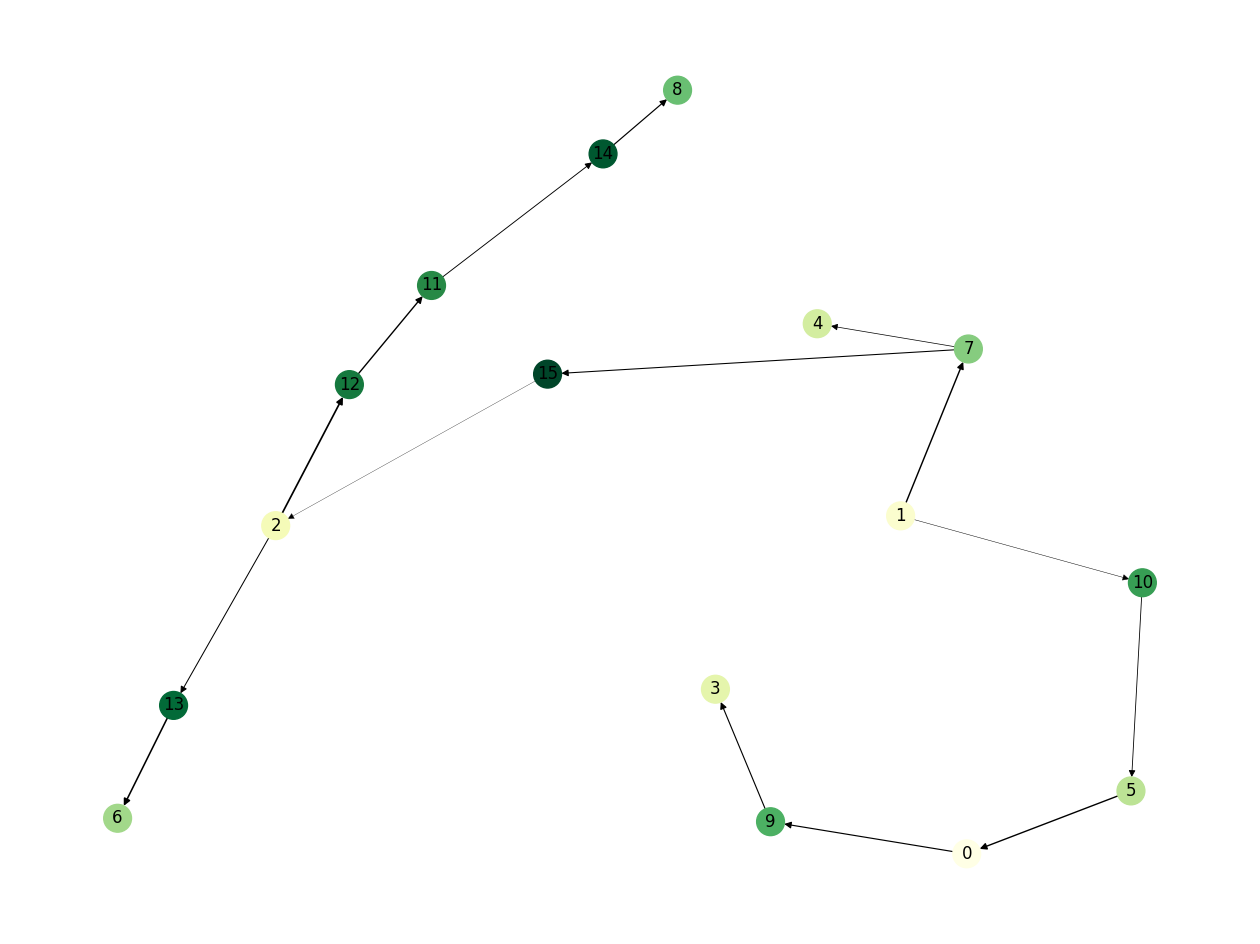

In [40]:
# Compute directed graph v2
G_directed_v2 = compute_trajectory_graph_v2(pseudotime, adj_cluster, data.obs['metric_clusters'], connectivity)
plot_trajectory_graph_v2(pseudotime, adj_cluster, data.obs['metric_clusters'], connectivity, node_positions, offset=0.2)

In [42]:
from utils.plot import generate_plot_embeddings, plot_gene_expression, plot_embeddings, plot_clusters
import matplotlib.pyplot as plt

In [43]:
X_embedded = generate_plot_embeddings(data.obsm['metric_embedding'], method='tsne', perplexity=150, random_state=0)
data.obsm['X_met_embedding'] = X_embedded

Runtime for generate_plot_embeddings(): 4.928558588027954


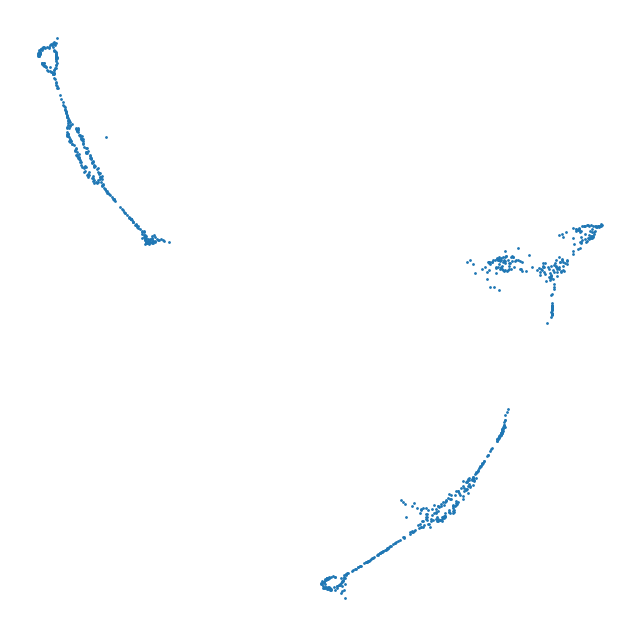

In [44]:
plot_embeddings(data.obsm['X_met_embedding'], s=1, figsize=(8, 8))